In [ ]:
# A part of the code was inspired by https://github.com/AlexeyAB/darknet

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# initialize the environment and download pre-trained weights

# %cd /content/gdrive/MyDrive/599_yolo/
# !git clone https://github.com/AlexeyAB/darknet
# !mkdir darknet/backup
# !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
# !mv yolov4.conv.137 darknet/backup/mask_yolo_last.weights

In [ ]:
# Unzip the files
# !unzip -q "/content/gdrive/MyDrive/599_yolo/archive_new.zip" -d "/content/gdrive/MyDrive/599_yolo/"

In [ ]:
# Generate the descriptive train.txt and test.txt

# import glob
# darknet_path = "/content/gdrive/MyDrive/599_yolo/darknet"
# folder = ["train", "test"]
# for name in folder:
#   all_files = glob.glob("/content/gdrive/MyDrive/599_yolo/archive_new/face_mask_"+ name +"/*.png")
#   with open(darknet_path + "/data/"+name+ ".txt", "w+") as output_file:
#     for file in all_files:
#       output_file.write(file + "\n")

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd /content/gdrive/MyDrive/599_yolo/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/gdrive/MyDrive/599_yolo/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv

In [ ]:
!chmod +x /content/gdrive/MyDrive/599_yolo/darknet

In [ ]:
# train
%cd /content/gdrive/MyDrive/599_yolo/darknet
! ./darknet detector train data/mask_yolo.data cfg/mask_yolo.cfg backup/mask_yolo_last.weights -dont_show -i 0 -map

/content/gdrive/MyDrive/599_yolo/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   3 route  1 		                           ->  256 x 256 x  64 
   4 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   5 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   6 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 2

/content/gdrive/MyDrive/599_yolo/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   3 route  1 		                           ->  256 x 256 x  64 
   4 conv     64       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  64 0.537 BF
   5 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   6 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   7 Shortcut Layer: 4,  wt = 0, 

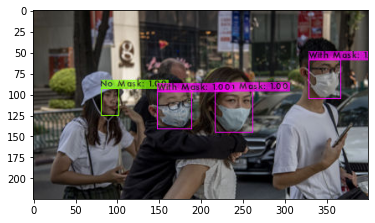

In [ ]:
# test
%cd /content/gdrive/MyDrive/599_yolo/darknet
!./darknet detector test data/mask_yolo.data cfg/mask_yolo.cfg backup/mask_yolo_best.weights ../archive_new/face_mask_test/maksssksksss842.png -dont_show

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('predictions.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# test with video
%cd /content/gdrive/MyDrive/599_yolo/darknet
!./darknet detector demo data/mask_yolo.data cfg/mask_yolo.cfg backup/mask_yolo_best.weights -dont_show ../archive_new/test_video_2.mp4 -i 0 -out_filename output_test_video_2.avi

Streaming output truncated to the last 5000 lines.
 cvWriteFrame 
Objects:

With Mask: 99% 

FPS:26.4 	 AVG_FPS:26.4

 cvWriteFrame 
Objects:

With Mask: 99% 

FPS:26.5 	 AVG_FPS:26.4

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:26.8 	 AVG_FPS:26.4

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:26.8 	 AVG_FPS:26.4

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:27.6 	 AVG_FPS:26.4

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:27.3 	 AVG_FPS:26.4

 cvWriteFrame 
Objects:

With Mask: 99% 

FPS:27.5 	 AVG_FPS:26.5

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:27.5 	 AVG_FPS:26.5

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:27.5 	 AVG_FPS:26.5

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:27.6 	 AVG_FPS:26.5

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:27.7 	 AVG_FPS:26.5

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:27.8 	 AVG_FPS:26.5

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:27.9 	 AVG_FPS:26.5

 cvWriteFrame 
Objects:

With Mask: 100% 

FPS:27.7 	 AVG_FPS:26.5

